<a href="https://colab.research.google.com/github/suryansh-raghuvanshi-data/ML-Projects/blob/main/KNN_Business_Use_Case_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement:**
---
A hyperlocal grocery delivery company is trying to reduce the delivery time of the order. One part of the solution include finding the optimal number of delivery partner for each type of store.


###Let's look at the dataset

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 32.4MB/s]


In [48]:
data = pd.read_csv('/content/multiclass.csv')
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|Fresh food products delivery count |
|**Milk**|milk products delivery count|
|**Grocery**|Grocery products delivery count|
|**Frozen**|Frozen food products delivery count|
|**Detergents_Paper**|washing products delivery count|
|**Delicassen**|imported products, cooked meat delivery count|
|**class**|Store catgeory (Class1, Class2, Class3)|

If we could predict the store category, we could later estimate the number of delivery partner we may need.
This looks like a classification problem. We could use KNN classification to correctly predict the store category we may solve a good chunk of the problem.

The store has 3 classes based on
 - how much products are delivered from a store

1. Class1 : High Traffic (Needs a high number of delivery partners)
2. Class2 : Moderate Traffic (Needs a decent number of delivery partners)
3. Class3 : Low Traffic (Needs a very small number of delivery partners)

In [49]:
data.shape

(440, 8)

Lets analyze the data

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [51]:
data.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.195455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.744289
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,2.000000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


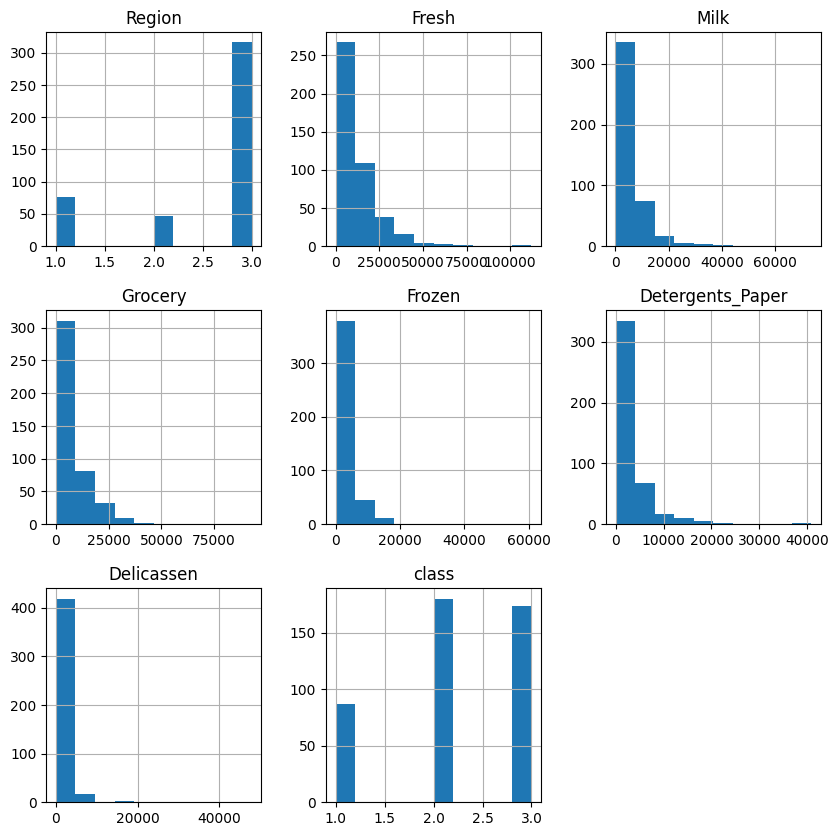

In [52]:
data.hist(figsize=(10,10))
plt.show()


*   Region & class are catagorical data and rest are continuous
*   Most of the data is Right-skwed
*   The class data is imbalance & multi-class

---

Continuous, discrete, ordinal and categorical can be used in KNN classification




Lets use Sklearn KKN classifier to predict the data and later we will try to use technique to improve the accuracy of the model.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [54]:
X = data.iloc[:,0:7]
Y = data['class']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 42, test_size = 0.2)

In [56]:
print(X_train.shape)
print(X_test.shape)

(352, 7)
(88, 7)


In [57]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [58]:
y_pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 92.04545454545455


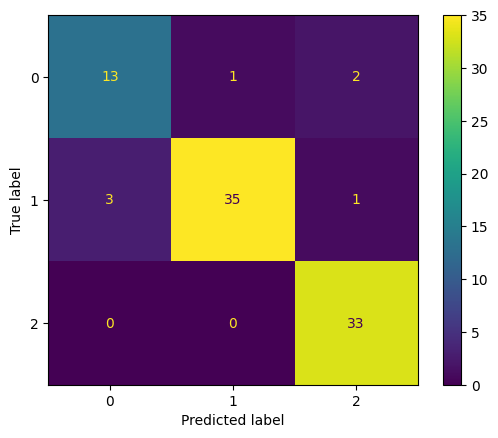

In [60]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

We will try to tune the hyperparameters.

In [61]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [62]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 93.18181818181817


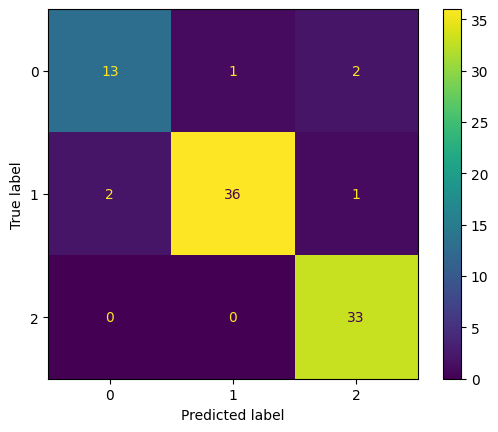

In [63]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

In [64]:
def optimum_neighbour(x,y,k):
  knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn.fit(x,y)
  y_pred = knn.predict(x)
  accuracy = accuracy_score(y, y_pred)
  return accuracy*100

In [65]:
acc_train = []
acc_test = []
for i in range(1,51):
  acc_train.append(optimum_neighbour(X_train,y_train,k=i))
  acc_test.append(optimum_neighbour(X_test,y_test,k=i))

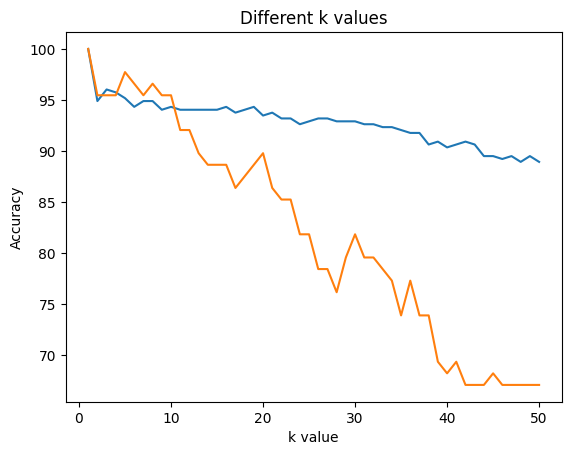

In [66]:
k = np.arange(1,51)
plt.plot(k,acc_train)
plt.plot(k,acc_test)
plt.title("Different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

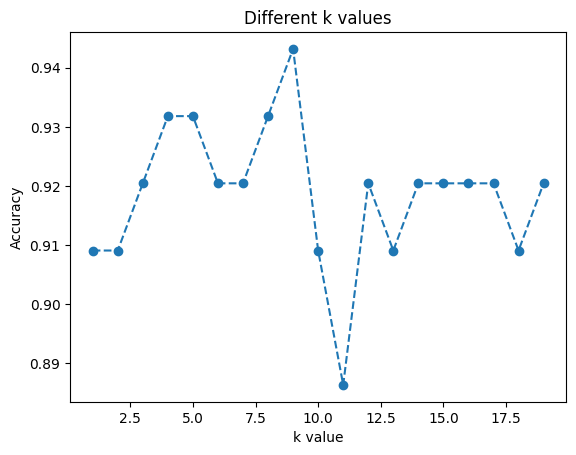

In [67]:
acc_test = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean',weights='distance')
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  acc_test.append(accuracy)

k = np.arange(1,20)
plt.plot(k,acc_test,linestyle='dashed',marker='o')
plt.title("Different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [68]:
k[np.argmax(acc_test)]

9

####Lets try to implement Data preprocessing and see how it affects the accuracy score

We will start with Scaling the features

In [69]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [70]:
  knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy*100)

87.5


Lets try to reduce the dimensions and try to analyze the affect on accuracy/


In [71]:
from sklearn.decomposition import PCA
acc = []
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 42, test_size = 0.2)
for i in range(2,7):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  knn.fit(X_train_pca,y_train)
  y_pred = knn.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  acc.append(accuracy)



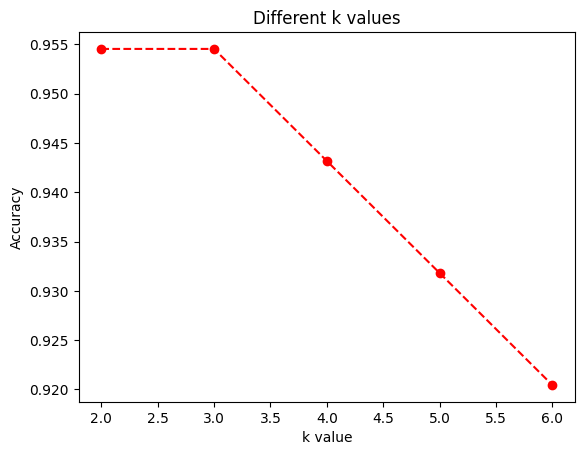

In [81]:
k = np.arange(2,7)
plt.plot(k,acc,linestyle='dashed',marker='o',color ='red')
plt.title("Different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

We see that 1st class is lower in compare to other 2 classes.

One of the main challenges with the k-NN algorithm is that it can be sensitive to class imbalance, which occurs when the number of examples in one class is significantly different from the number of examples in another class. This can cause the algorithm to be biased towards the majority class, and can lead to poor performance on the minority class.This is because the k-NN algorithm assigns the class label of the majority class to the test point if the majority of the k-nearest neighbors belong to the majority class. This can lead to the majority class dominating the predictions, even though the minority class is actually more similar to the test point.To mitigate this issue, you can use techniques like oversampling the minority class, undersampling the majority class, or using cost-sensitive learning to adjust the class weights. Additionally, you can also use ensemble methods like SMOTE and ADASYN to create synthetic samples of the minority class in the training data.

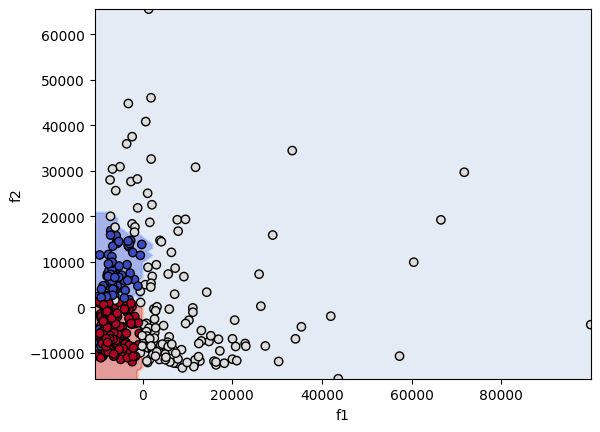

In [79]:
from sklearn.inspection import DecisionBoundaryDisplay

pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_train)

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_train)

disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

In [74]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_sm,y_sm = smt.fit_resample(X_train,y_train)

In [80]:
print('Before')
print(y_train.value_counts())
print('After')
print(y_sm.value_counts())

Before
2    141
3    140
1     71
Name: class, dtype: int64
After
2    141
1    141
3    141
Name: class, dtype: int64


In [76]:
  knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
  knn.fit(X_sm,y_sm)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy*100)

89.77272727272727


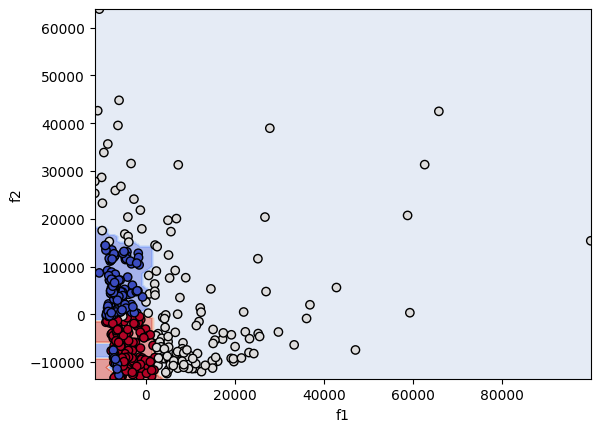

In [77]:


pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_sm)

disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

**Conclusion:**

In this analysis, we explored the use of the K-Nearest Neighbors (KNN) classification algorithm to predict the category of stores for a hyperlocal grocery delivery company. The goal was to determine the optimal number of delivery partners required for each type of store, categorized as Class 1 (High Traffic), Class 2 (Moderate Traffic), and Class 3 (Low Traffic), based on the delivery counts of various product categories.

Here are the key findings and conclusions from our analysis:

1. **Data Exploration:** We began by loading and exploring the dataset, which consisted of information on store locations, delivery counts for different product categories, and store categories. The data had 440 entries and 8 columns.

2. **Data Preprocessing:** We observed that the data contained categorical and continuous features, and it was right-skewed. We identified that the class distribution was imbalanced, which could affect the performance of our model. To address this, we explored various preprocessing techniques.

3. **Initial Model:** We initially built a KNN classification model without any preprocessing and achieved an accuracy of approximately 92%. This model served as our baseline.

4. **Hyperparameter Tuning:** We experimented with hyperparameter tuning, specifically changing the number of neighbors (k) and the distance metric used. By selecting k=9, we achieved a slight improvement in accuracy to around 93%.

5. **Feature Scaling:** We standardized the continuous features using StandardScaler to bring them to a common scale. However, this preprocessing step resulted in a decrease in accuracy to 87.5%, indicating that feature scaling was not suitable for this dataset.

6. **Dimensionality Reduction:** We performed Principal Component Analysis (PCA) to reduce the dimensionality of the data. While PCA showed promise in reducing the dimensions, it did not consistently improve accuracy, and the optimal number of components was around 3 to 4.

7. **Handling Class Imbalance:** To address the issue of class imbalance, we employed Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution in the training data. This technique droped accuracy to approximately 89.77%.

8. **Visualizing Decision Boundaries:** We visualized the decision boundaries of the KNN classifier before and after applying SMOTE. The visualization showed that SMOTE helped the classifier better separate the classes.

In conclusion, K-Nearest Neighbors can be a valuable tool for classifying stores into different categories based on delivery counts of various product categories. However, to achieve the best results, it's important to consider data preprocessing techniques such as handling class imbalance through SMOTE. Additionally, the choice of hyperparameters and feature scaling should be carefully tuned based on the specific dataset. Further model evaluation and optimization could be conducted to fine-tune the accuracy and reliability of the store category predictions, ultimately aiding in the optimization of delivery partner allocation for the hyperlocal grocery delivery company.